In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,998,1004
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,762,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,69,70


In [4]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,168,169,173,178,187,193,205,216,218,219
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,32,32
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,542,548,555,561,568,575,582,592,600,609
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,3,3,4,4,4


In [5]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,745,778,801,850,930,938,996,1040,1075,1097
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,714,715,727,742,758,771,777,783,789,795
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,615,617,624,628,639,639,652,653,653,663
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,17,17,17,17,17,18,18,18


In [6]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-24-2020.csv')
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-25 02:32:44,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-25 02:32:44,30.295065,-92.414197,291,18,0,273,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-25 02:32:44,37.767072,-75.632346,727,11,0,716,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-25 02:32:44,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-25 02:32:44,41.330756,-94.471059,8,0,0,8,"Adair, Iowa, US"


In [7]:
#fetching all the columns from the confirmed datasets
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/16/20', '5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20',
       '5/22/20', '5/23/20', '5/24/20', '5/25/20'],
      dtype='object', length=129)

In [8]:
#extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recovered = recovered_cases.loc[:, cols[4]:cols[-1]]


In [9]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
0,0,0,0,0,0,0,0,0,0,0,...,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
1,0,0,0,0,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,998,1004
2,0,0,0,0,0,0,0,0,0,0,...,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503
3,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,762,763
4,0,0,0,0,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,69,70
5,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,0,0,0,0,0,0,0,0,0,0,...,7805,8068,8371,8809,9283,9931,10649,11353,12076,12628
7,0,0,0,0,0,0,0,0,0,0,...,4283,4472,4823,5041,5271,5606,5928,6302,6661,7113
8,0,0,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,0,0,0,0,3,4,4,4,4,4,...,3075,3076,3078,3081,3082,3084,3086,3087,3090,3092


In [10]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
india_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
india_deaths = []

china_recovered = []
italy_recovered = []
us_recovered = []
spain_recovered = []
france_recovered = []
germany_recovered = []
india_recovered = []




In [11]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    
    china_recovered.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recovered.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recovered.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recovered.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recovered.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recovered.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    india_recovered.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())
   

In [12]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97888,
 101806,
 105848,
 109822,
 113595,
 118623,
 125879,
 131007,
 145225,
 156120,
 167507,
 181653,
 197150,
 214873,
 242632,
 272264,
 304580,
 337022,
 378301,
 418295,
 467817,
 529722,
 593764,
 661174,
 720291,
 782816,
 857608,
 933010,
 1013863,
 1096324,
 1176436,
 1249743,
 1321436,
 1396438,
 1480232,
 1566102,
 1658261,
 1736412,
 1835145,
 1905165,
 1975566,
 2055748,
 2152181,
 2239990,
 2317636,
 2400787,
 2472109,
 2549046,
 2624608,
 2708403,
 2795731,
 2881140,
 2955033,
 3023722,
 3097229,
 3172287,
 3256910,
 3345558,
 3427584,
 3506729,
 3583055,
 3662691,
 3756069,
 3845718,
 3938064,
 4024009,
 4101699,
 4177502,
 4261747,
 4347018

In [13]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3347,
 3459,
 3558,
 3801,
 3987,
 4263,
 4614,
 4912,
 5409,
 5832,
 6473,
 7151,
 7957,
 8824,
 9947,
 11423,
 13125,
 14826,
 16759,
 19017,
 21789,
 24788,
 28292,
 31811,
 35323,
 39443,
 44238,
 49685,
 55834,
 61826,
 67996,
 73077,
 78767,
 86662,
 93354,
 100915,
 108137,
 114170,
 119853,
 125561,
 132439,
 140685,
 147963,
 156821,
 163236,
 167772,
 173124,
 180236,
 186912,
 193665,
 199997,
 206187,
 209900,
 214444,
 220801,
 227665,
 233360,
 238619,
 243813,
 247470,
 251537,
 257239,
 263855,
 269567,
 274898,
 279311,
 282709,
 286330,
 291942,
 297197,
 302418,
 307666,
 311781,
 315185,
 318481,
 323285,
 328115,
 332924,
 338160,
 342097,
 345059,
 346232]

In [14]:
confirmed_sum

5495061

In [15]:
death_sum

346232

In [16]:
recovered_sum

2231738

In [17]:
india_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950]

In [18]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

In [19]:
#Confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
india_daily_increase = daily_increase(india_cases)

In [20]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414]

In [21]:
china_daily_increase


[548,
 95,
 277,
 486,
 669,
 802,
 2632,
 578,
 2054,
 1661,
 2089,
 4739,
 3086,
 3991,
 3733,
 3147,
 3523,
 2704,
 3015,
 2525,
 2032,
 373,
 15136,
 6463,
 2055,
 2100,
 1921,
 1777,
 408,
 458,
 473,
 1451,
 21,
 219,
 513,
 412,
 434,
 328,
 428,
 576,
 204,
 125,
 125,
 151,
 153,
 80,
 53,
 37,
 27,
 34,
 11,
 13,
 32,
 26,
 30,
 25,
 44,
 54,
 94,
 55,
 130,
 63,
 93,
 70,
 121,
 115,
 102,
 123,
 76,
 81,
 82,
 71,
 79,
 32,
 59,
 63,
 53,
 91,
 74,
 58,
 73,
 120,
 79,
 93,
 50,
 47,
 357,
 27,
 18,
 12,
 36,
 15,
 16,
 15,
 10,
 3,
 6,
 22,
 4,
 12,
 3,
 0,
 5,
 2,
 2,
 2,
 5,
 1,
 14,
 20,
 1,
 7,
 6,
 5,
 9,
 6,
 10,
 9,
 0,
 0,
 0,
 18,
 3,
 11,
 7]

In [22]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414]

In [23]:
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
france_daily_death = daily_increase(france_deaths)
spain_daily_death = daily_increase(spain_deaths)
germany_daily_death = daily_increase(germany_deaths)
india_daily_death = daily_increase(india_deaths)

In [24]:
india_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121,
 136,
 98,
 104,
 118,
 154,
 131,
 146,
 132,
 150,
 142,
 142,
 156,
 148]

In [25]:
#recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recovered)
italy_daily_recovery = daily_increase(italy_recovered)
us_daily_recovery = daily_increase(us_recovered)
spain_daily_recovery = daily_increase(spain_recovered)
france_daily_recovery = daily_increase(france_recovered)
germany_daily_recovery = daily_increase(germany_recovered)
india_daily_recovery = daily_increase(india_recovered)

In [26]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014]

In [27]:
unique_countries = list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Italy',
 'Brazil',
 'Mexico',
 'Canada',
 'Spain',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Germany',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'G

In [28]:
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = []

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
#Sort countries by the number of confirmed cases

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse = True)]
for i in range (len(unique_countries)):
        country_confirmed_cases[i] =latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
        country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
        country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
        country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
        country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])




In [29]:
country_df = (pd.DataFrame({'Country Name':unique_countries, 'Number of Confirmed Cases':country_confirmed_cases,
                            'Number of Deaths':country_death_cases, 'Number of Recovery Cases':country_recovery_cases, 
                            'Number of active cases':country_active_cases, 'Mortality Rate':country_mortality_rate}))
#number of cases per country--
country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recovery Cases,Number of active cases,Mortality Rate
0,US,1643246,97720,366736,1178790,0.0594677
1,Brazil,363211,22666,149911,190634,0.0624045
2,Russia,344481,3541,113299,227641,0.0102792
3,United Kingdom,260916,36875,1151,222890,0.141329
4,Spain,235772,28752,150376,56644,0.121948
5,Italy,229858,32785,140479,56594,0.142632
6,France,182709,28370,64735,89604,0.155274
7,Germany,180328,8283,160281,11764,0.045933
8,Turkey,156827,4340,118694,33793,0.0276738
9,India,138536,4024,57692,76820,0.0290466


In [30]:
unique_provinces = list(latest_data['Province_State'].unique())

In [31]:
province_confirmed_cases = []
province_death_cases = []
province_country = []
province_recovery_cases = []
province_mortality_rate = []

no_cases = []
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)
    
#Sort countries by the number of confirmed cases

unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse = True)]
for i in range (len(unique_provinces)):
        province_confirmed_cases[i] =latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
        province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
        province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
        province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
      
        province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])




In [32]:
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country':province_country, 'Number of Confirmed cases':province_confirmed_cases, 'Number of Death cases':province_death_cases,'Number of Recovered Cases':province_recovery_cases,'Mortality Rate':province_mortality_rate})
province_df.style.background_gradient(cmap='Reds')

,Province/State Name,Country,Number of Confirmed cases,Number of Death cases,Number of Recovered Cases,Mortality Rate
0,New York,US,361515,29141,0,0.080608
1,New Jersey,US,154154,11138,0,0.0722524
2,Illinois,US,110304,4856,0,0.0440238
3,California,US,94020,3754,0,0.0399277
4,Massachusetts,US,92675,6372,0,0.0687564
5,Lombardia,Italy,87110,15840,45656,0.181839
6,Sao Paulo,Brazil,82161,6163,0,0.0750113
7,Pennsylvania,US,71563,5136,0,0.0717689
8,Hubei,China,68135,4512,63617,0.0662215
9,Madrid,Spain,67871,8977,0,0.132266


In [33]:
#dealing with the missing values~

nan_indices = []

#handle nan if there is any... it is usually float

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]==float):
        nan_indices.append(i)
        
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop()
    province_confirmed_cases.pop()

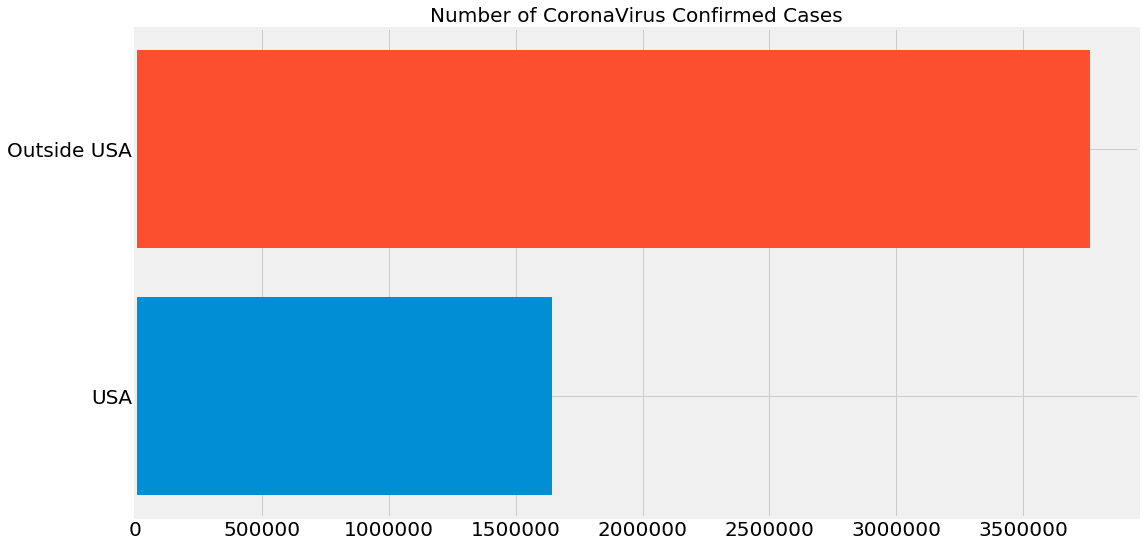

In [34]:
USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases) - USA_confirmed
plt.figure(figsize=(16,9))
plt.barh('USA',USA_confirmed)
plt.barh('Outside USA',outside_USA_confirmed)
plt.title('Number of CoronaVirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [35]:
print('Outside USA {} cases'.format(outside_USA_confirmed))
print('USA {} cases'.format(USA_confirmed))
print('Total {} cases'.format(outside_USA_confirmed+USA_confirmed))

Outside USA 3764367 cases
USA 1643246 cases
Total 5407613 cases


In [36]:
#Only show 10 countries with highest confirmed, others show others
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [37]:
def plot_bar_graph(x, y, title):
    plt.figure(figsize=(16,9))
    plt.barh(x,y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

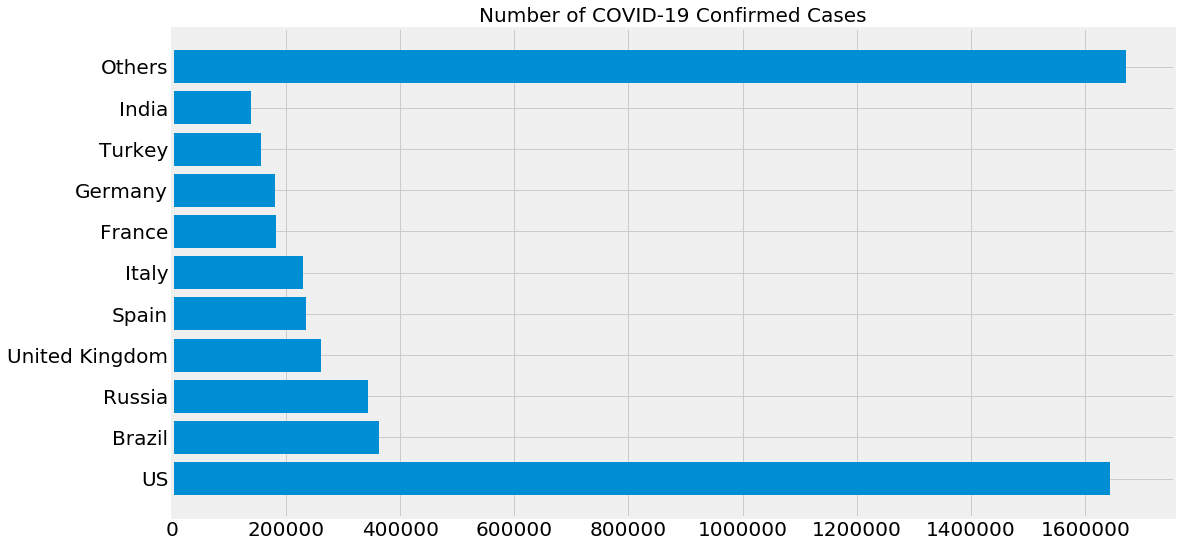

In [38]:
plot_bar_graph(visual_unique_countries, visual_confirmed_cases, 'Number of COVID-19 Confirmed Cases')


In [39]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
india_confirmed_cases = np.array(india_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [40]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-20]

In [41]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [42]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
        future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [48]:
X_train_confirmed, X_test_confirmed, Y_train_confirmed, Y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle = False)

In [51]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed =
train_test_split(days_since_1_22, india_cases, test_size=0.2, random_state = 0)

In [52]:
#Transform the data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [53]:
#Polynomial Regression
linear_model = LinearRegression(normalize = True, fit_intercept = False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:',mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


MAE: 2185.7626758879287
MSE: 6612932.5084639145


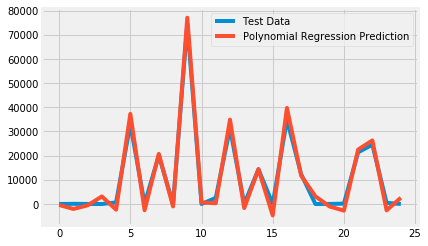

In [54]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data','Polynomial Regression Prediction'])

In [55]:
#SVM 
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1,degree=5)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/legend.py:794: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/legend.py:794: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/legend.py:794: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_han

MAE: 2816.121760878107
MSE: 14276221.447054649


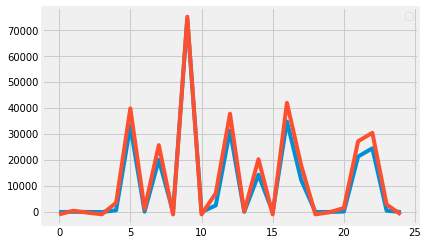

In [56]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend('Test Data','SVM Predictions')
print('MAE:',mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

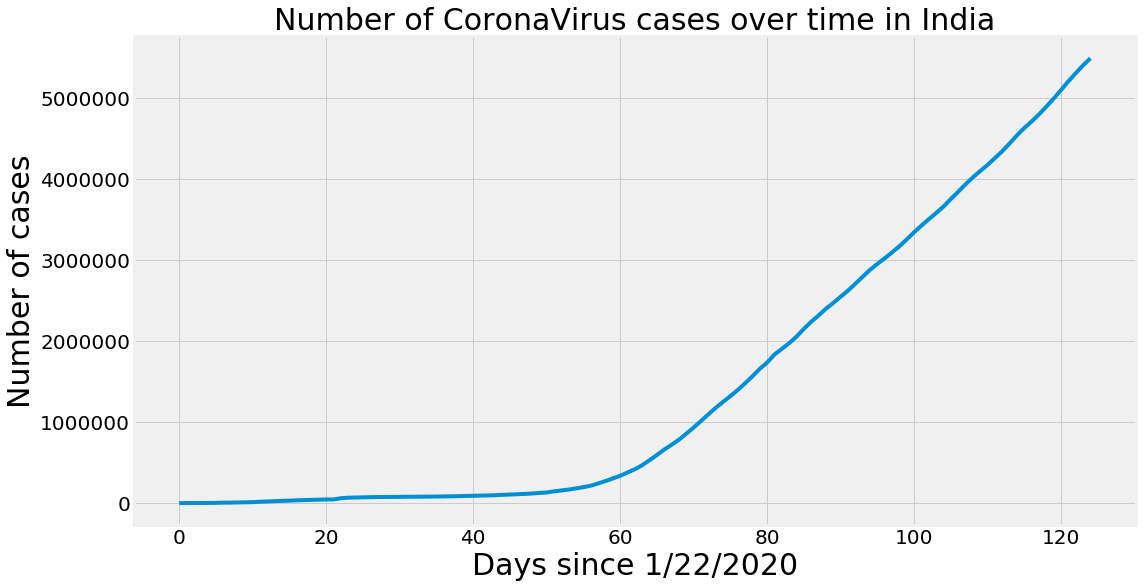

In [57]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of CoronaVirus cases over time in India', size = 30)
plt.xlabel('Days since 1/22/2020',size= 30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

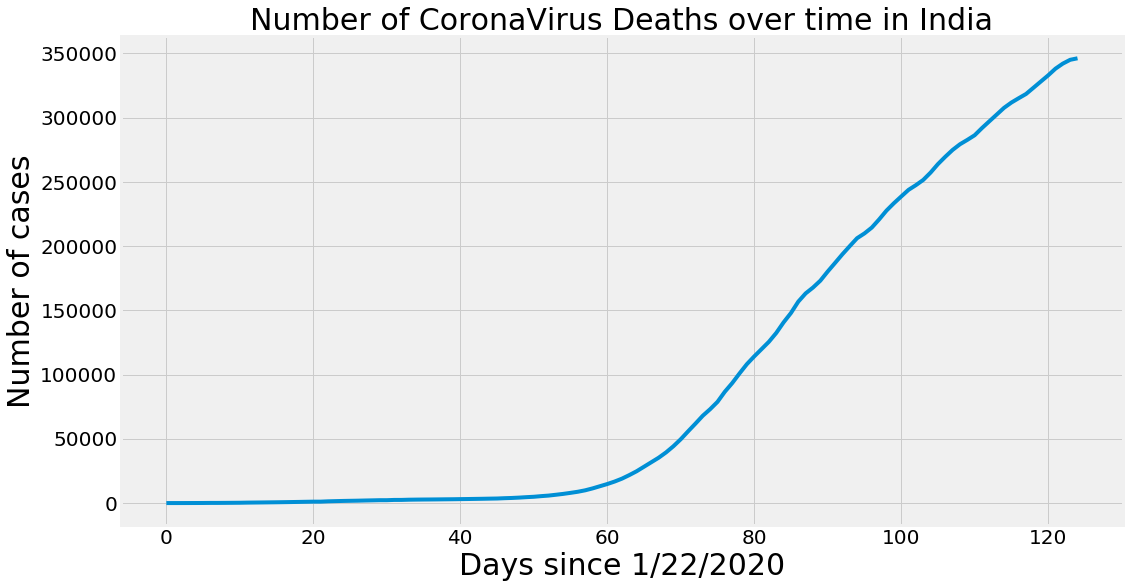

In [58]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of CoronaVirus Deaths over time in India',size=30)
plt.xlabel('Days since 1/22/2020',size= 30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

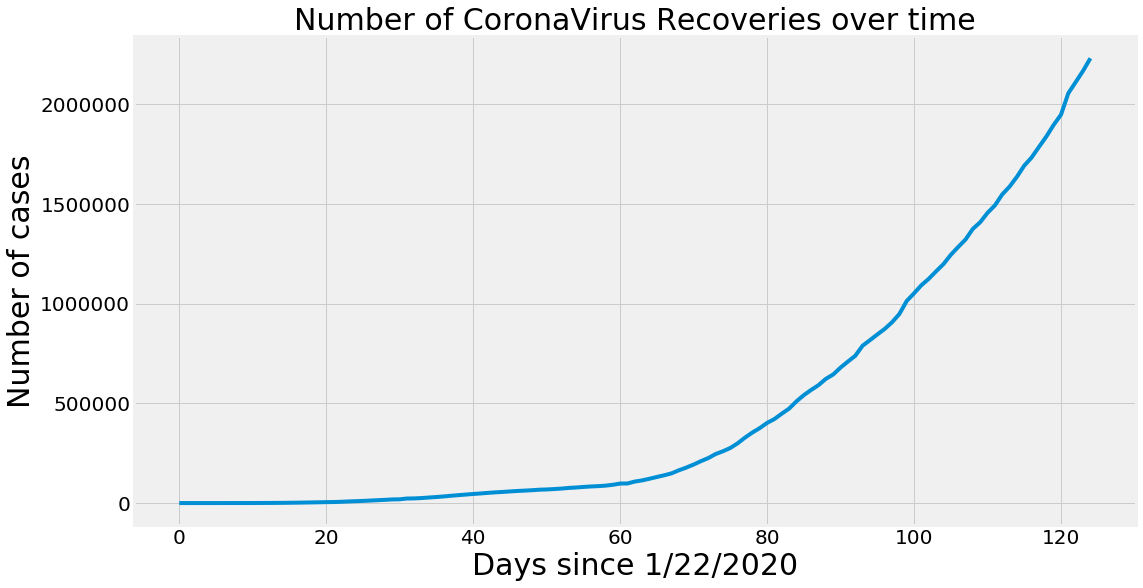

In [59]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of CoronaVirus Recoveries over time',size=30)
plt.xlabel('Days since 1/22/2020',size= 30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

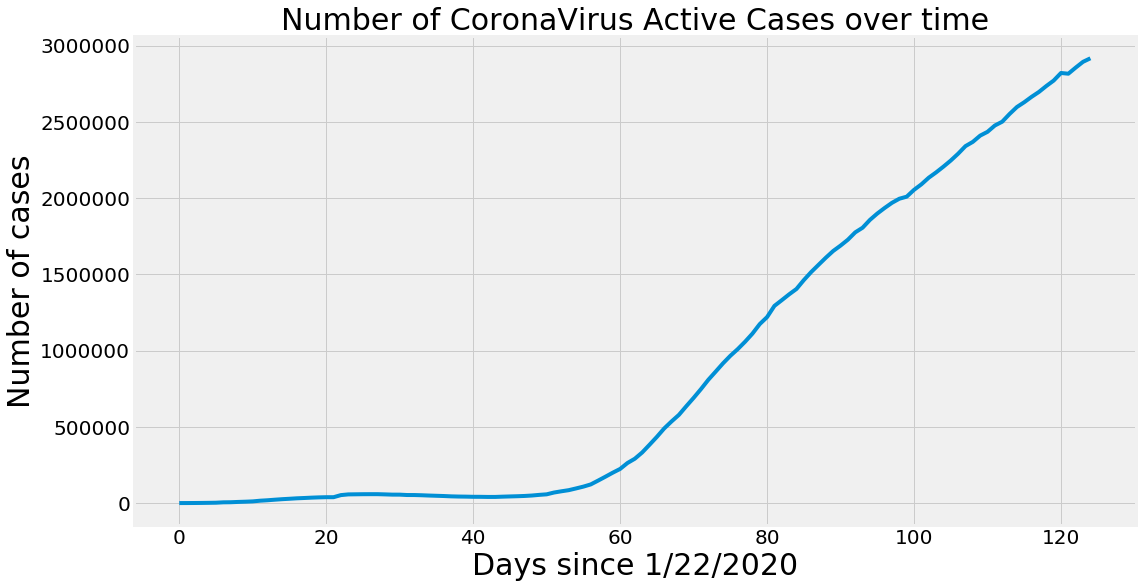

In [60]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_active )
plt.title('Number of CoronaVirus Active Cases over time',size=30)
plt.xlabel('Days since 1/22/2020',size= 30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

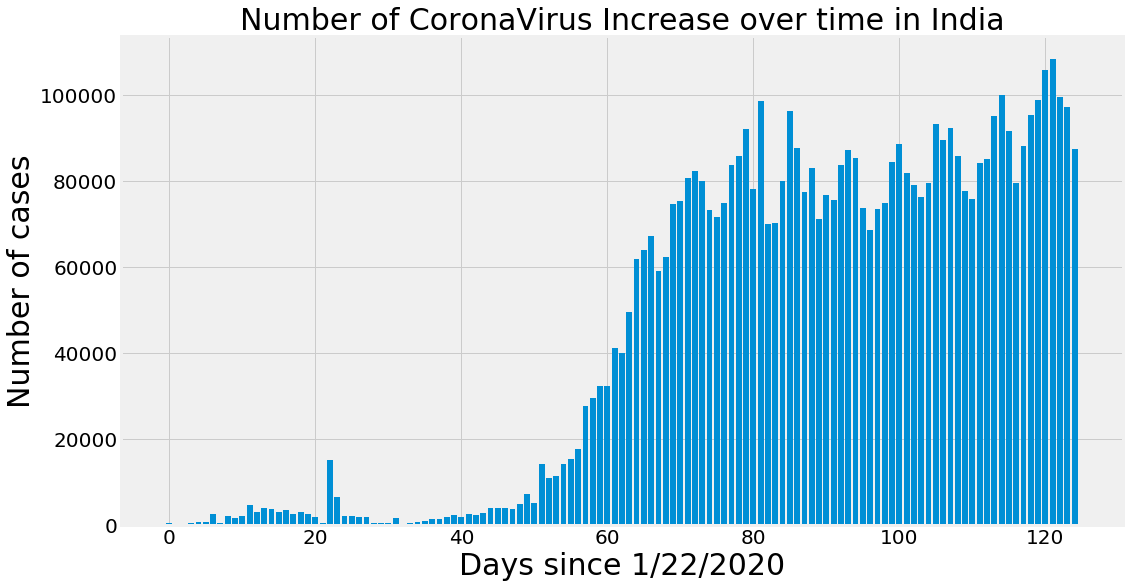

In [61]:
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('Number of CoronaVirus Increase over time in India',size=30)
plt.xlabel('Days since 1/22/2020',size= 30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

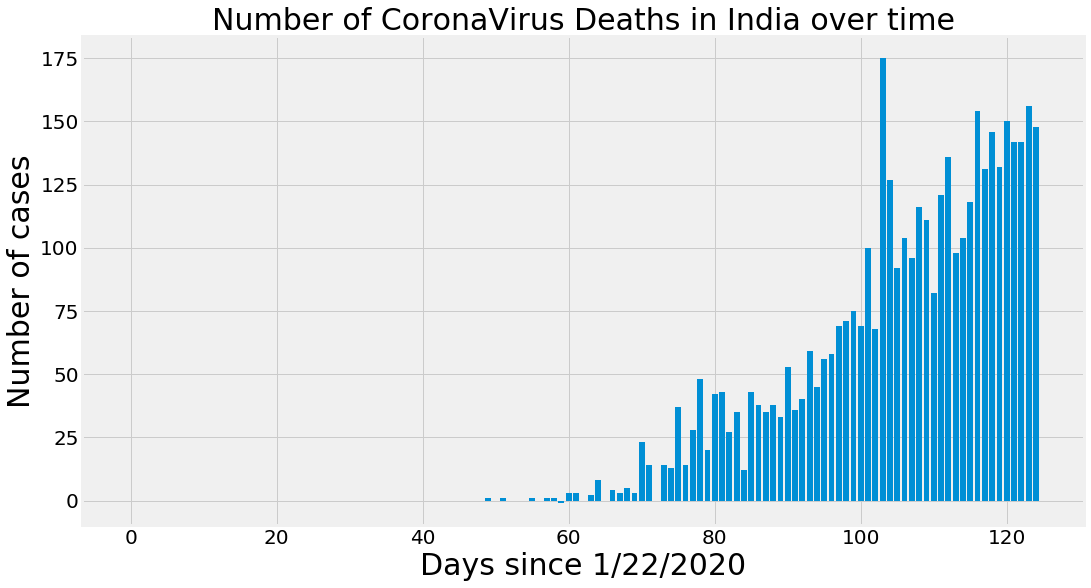

In [62]:
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, india_daily_death)
plt.title('Number of CoronaVirus Deaths in India over time',size=30)
plt.xlabel('Days since 1/22/2020',size= 30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

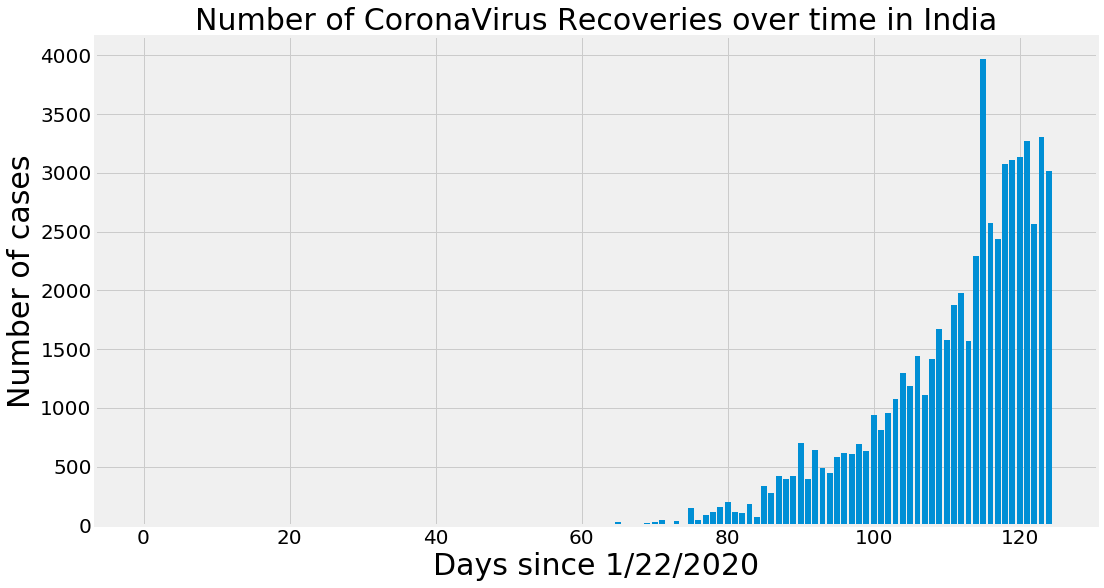

In [63]:
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, india_daily_recovery)
plt.title('Number of CoronaVirus Recoveries over time in India',size=30)
plt.xlabel('Days since 1/22/2020',size= 30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [64]:
def plot_predictions(x, y, z, algo_name, color, **optionsdic):
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.plot(future_forecast, linear_pred, linestyle='dashed', color=color)
    plt.title('Number of CoronaVirus cases over time in India', size = 30)
    plt.xlabel('Days since 1/22/2020',size= 30)
    plt.ylabel('Number of cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size':20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [66]:

def plot_predictions(x, y, algo_name, color, **optionsdic):
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.plot(future_forecast, linear_pred, linestyle='dashed', color=color)
    plt.title('Number of CoronaVirus cases over time in India', size = 30)
    plt.xlabel('Days since 1/22/2020',size= 30)
    plt.ylabel('Number of cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size':20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

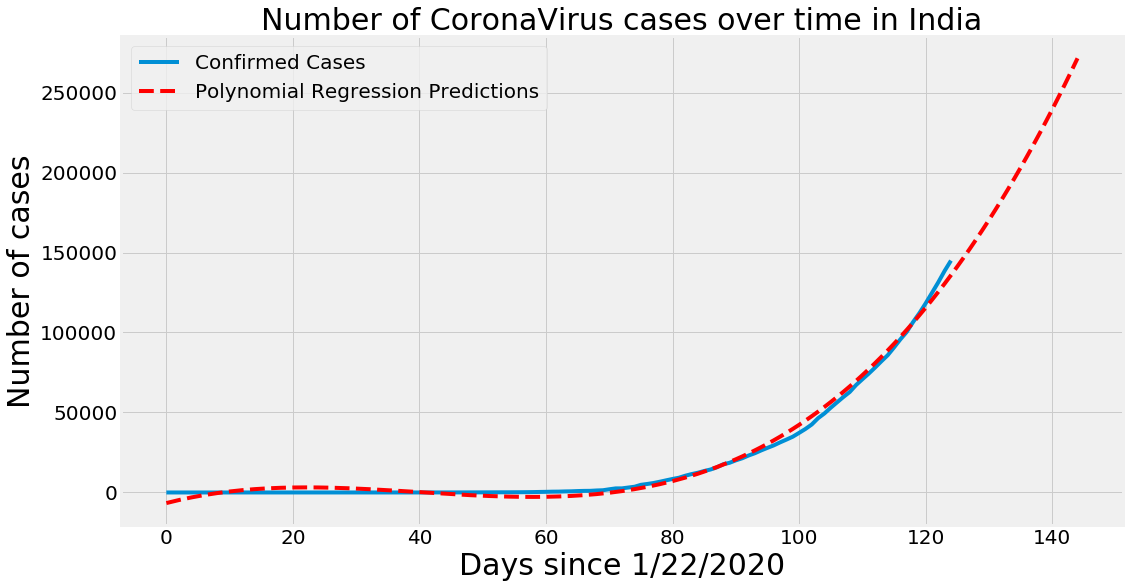

In [65]:

plot_predictions(adjusted_dates, india_cases, linear_pred, 'Polynomial Regression Predictions','red')

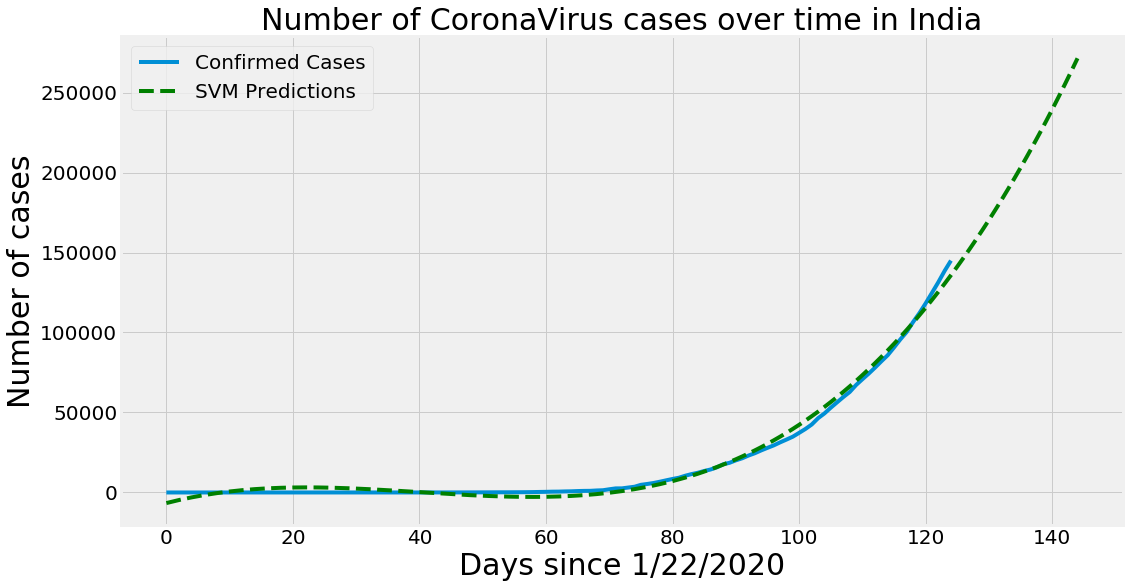

In [67]:
plot_predictions(adjusted_dates, india_cases, 'SVM Predictions','green')

In [68]:
#Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date':future_forecast_dates[-20:],'Predicted number of cases in India by Polynomial Regression':np.round(linear_pred[-20:])})
poly_df

,Date,Predicted number of cases in India by Polynomial Regression
0,05/26/2020,141226.0
1,05/27/2020,146770.0
2,05/28/2020,152451.0
3,05/29/2020,158269.0
4,05/30/2020,164226.0
5,05/31/2020,170325.0
6,06/01/2020,176566.0
7,06/02/2020,182951.0
8,06/03/2020,189482.0
9,06/04/2020,196160.0


In [69]:
#Future predictions using SVM
svm_df = pd.DataFrame({'Date':future_forecast_dates[-20:],'Predicted number of cases India by SVM':np.round(svm_pred[-20:])})
svm_df

,Date,Predicted number of cases India by SVM
0,05/26/2020,136912.0
1,05/27/2020,142514.0
2,05/28/2020,148297.0
3,05/29/2020,154265.0
4,05/30/2020,160423.0
5,05/31/2020,166774.0
6,06/01/2020,173324.0
7,06/02/2020,180077.0
8,06/03/2020,187038.0
9,06/04/2020,194211.0


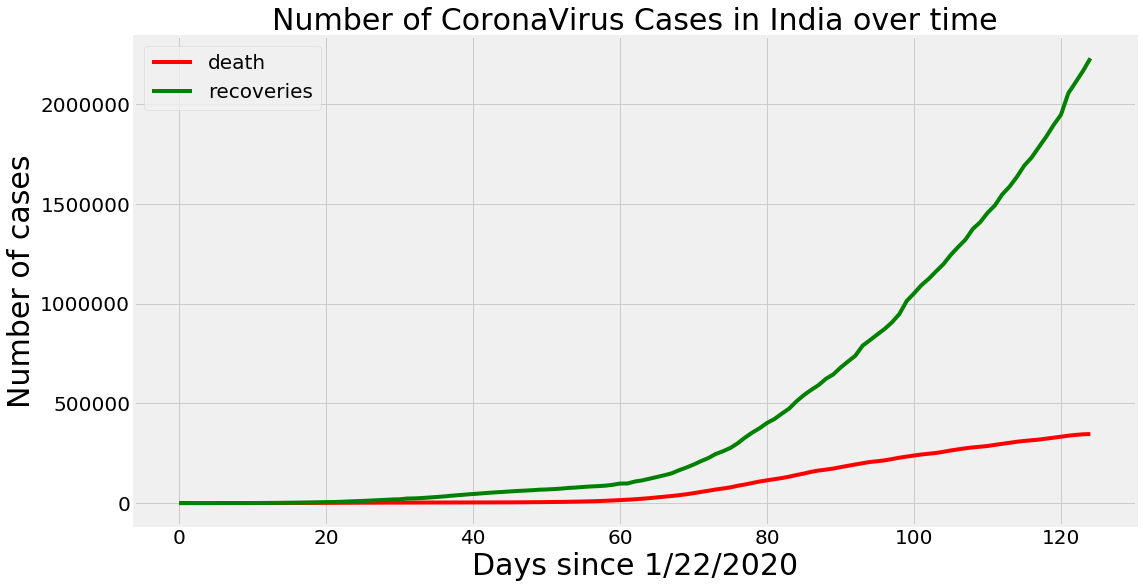

In [70]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death','recoveries'], loc='best', fontsize=20)
plt.title('Number of CoronaVirus Cases in India over time',size=30)
plt.xlabel('Days since 1/22/2020',size= 30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

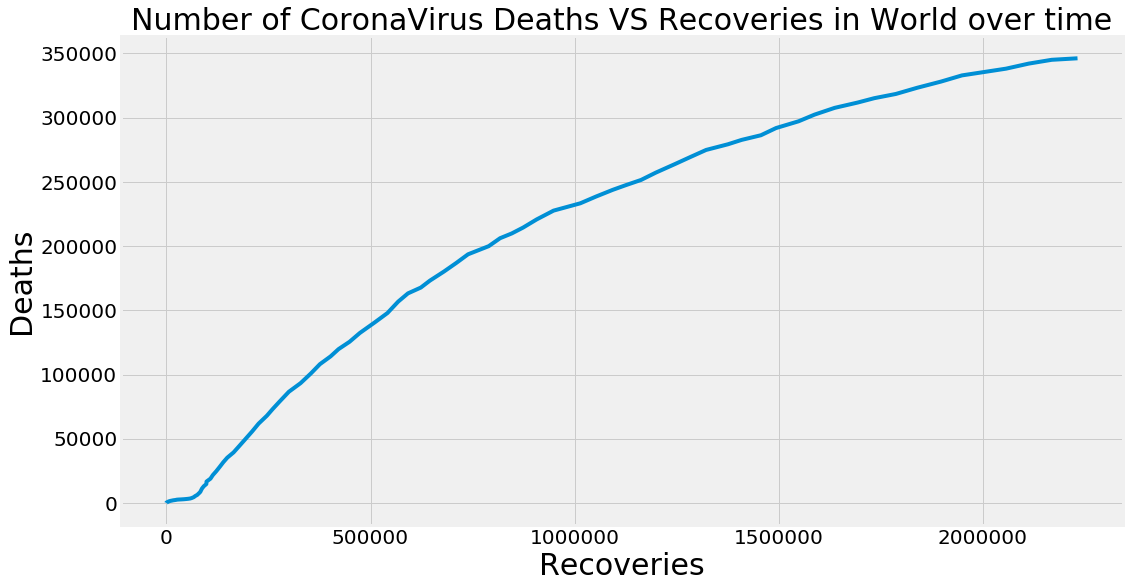

In [71]:
plt.figure(figsize=(16,9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of CoronaVirus Deaths VS Recoveries in World over time',size=30)
plt.xlabel('Recoveries',size= 30)
plt.ylabel('Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [72]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16,9))
    plt.plot(x,y1)
    plt.title('{} Confirmed cases'.format(country), size=30)
    plt.xlabel('Days since 1/22/2020',size= 30)
    plt.ylabel('Number of cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.bar(x,y2)
    plt.title('{} Daily increases in COnfirmed cases'.format(country), size=30)
    plt.xlabel('Days since 1/22/2020',size= 30)
    plt.ylabel('Number of cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.bar(x,y3)
    plt.title('{} Daily increases in Death cases'.format(country), size=30)
    plt.xlabel('Days since 1/22/2020',size= 30)
    plt.ylabel('Number of cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16,9))
    plt.bar(x,y4)
    plt.title('{} Daily increases in Recovery cases'.format(country), size=30)
    plt.xlabel('Days since 1/22/2020',size= 30)
    plt.ylabel('Number of cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    
    
    
    
    
    

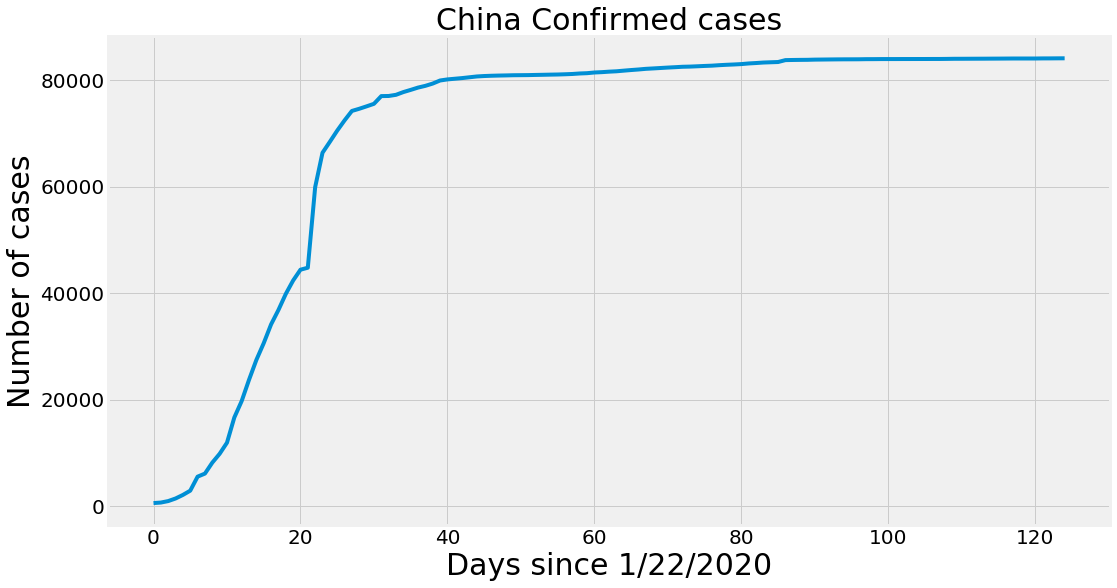

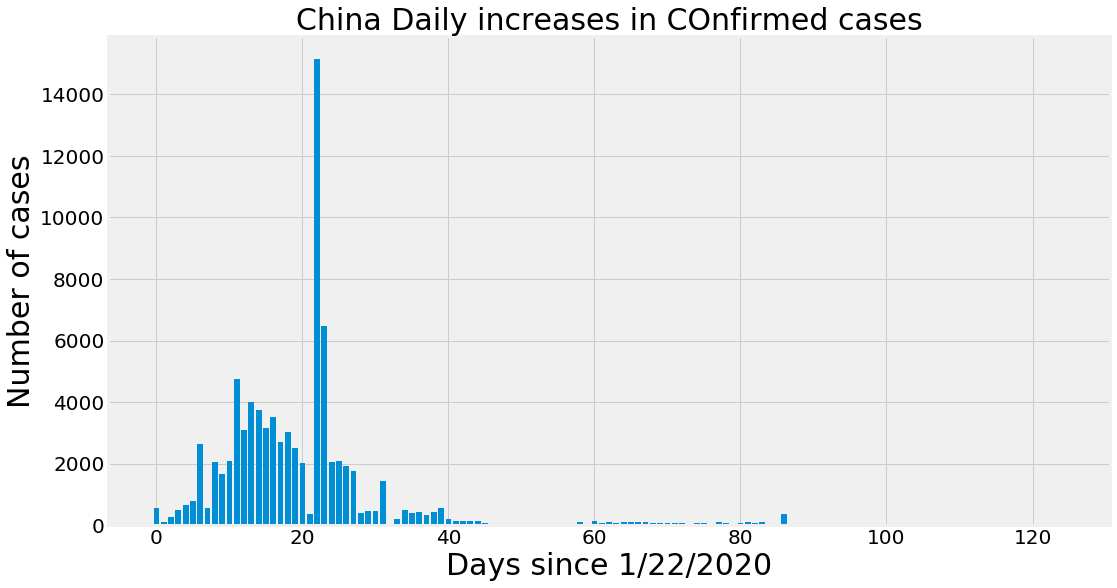

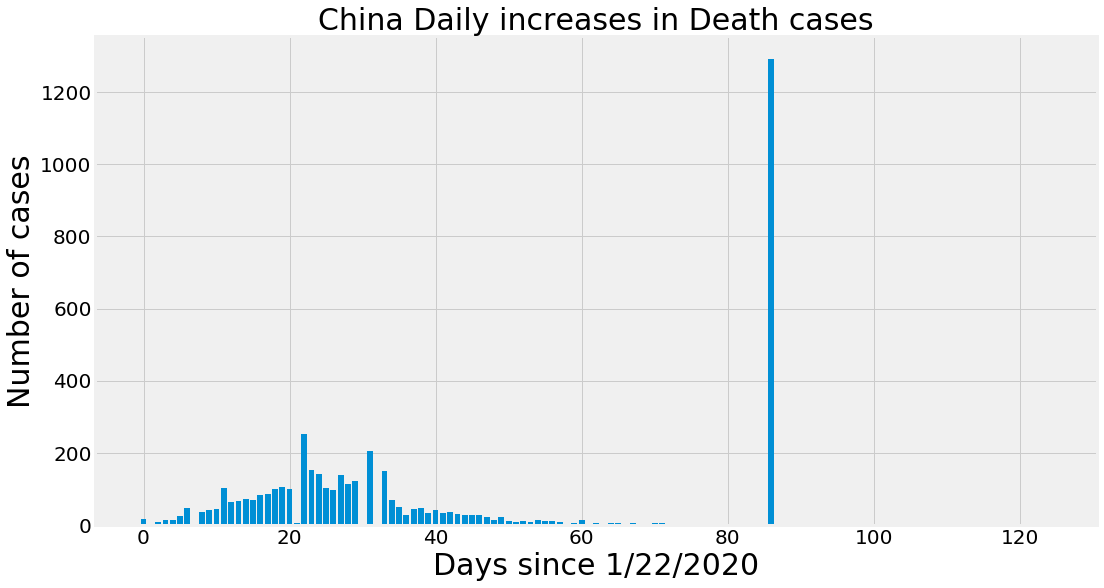

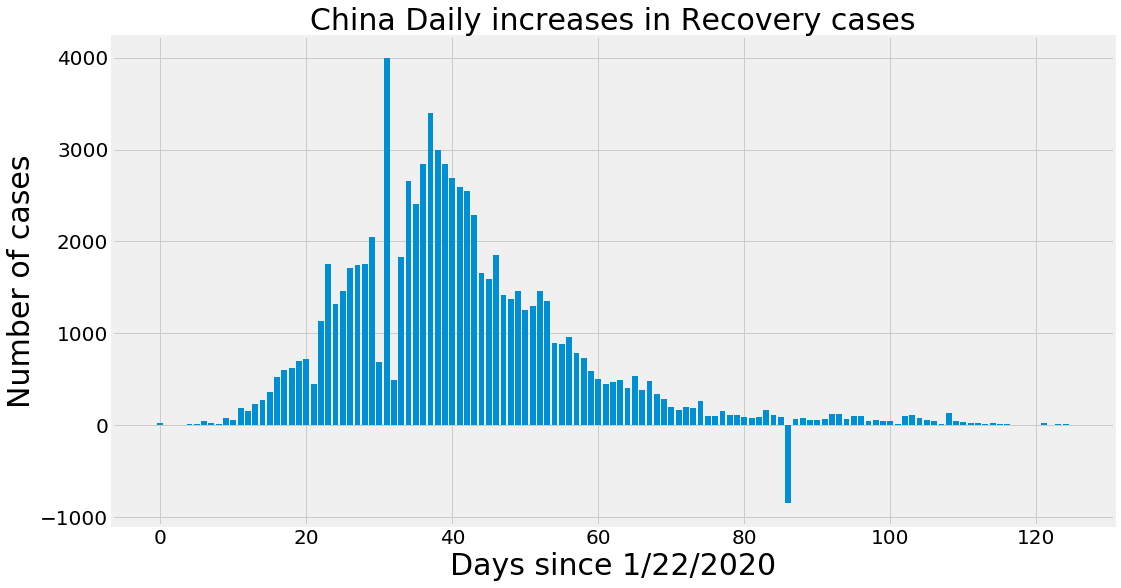

In [73]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery,'China')

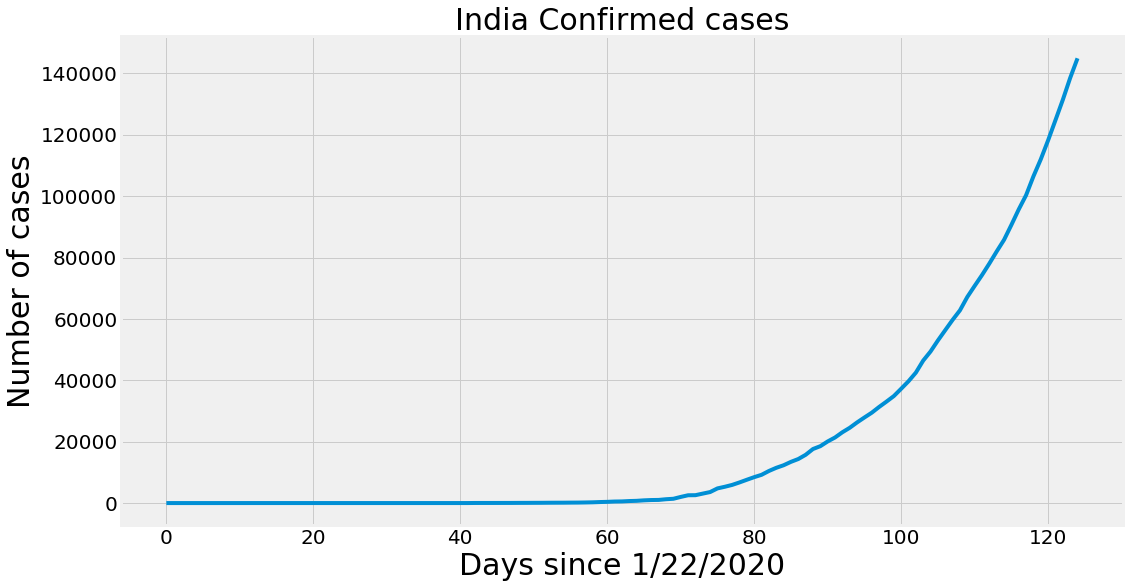

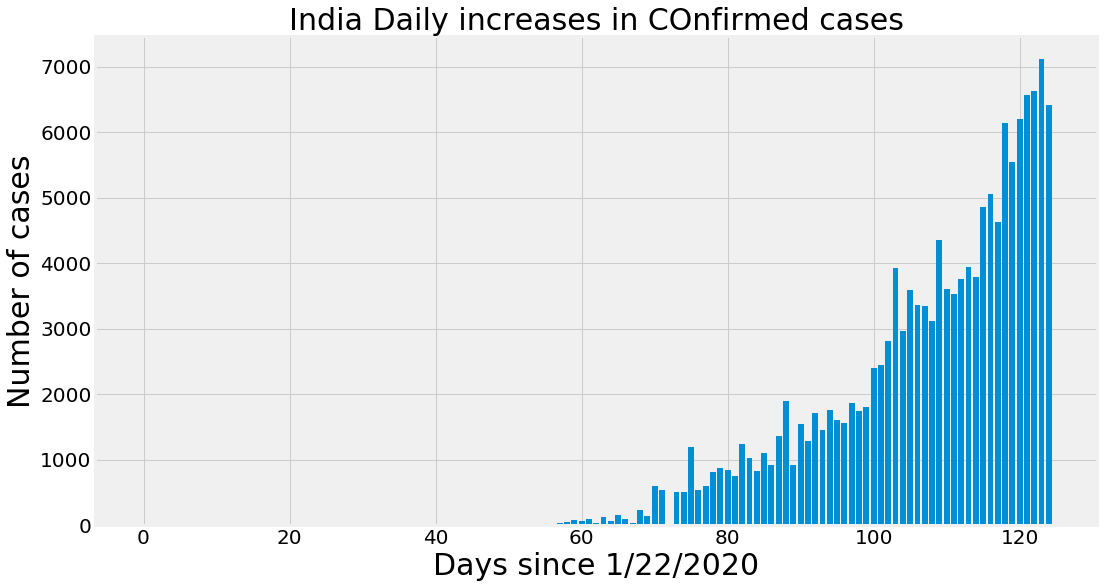

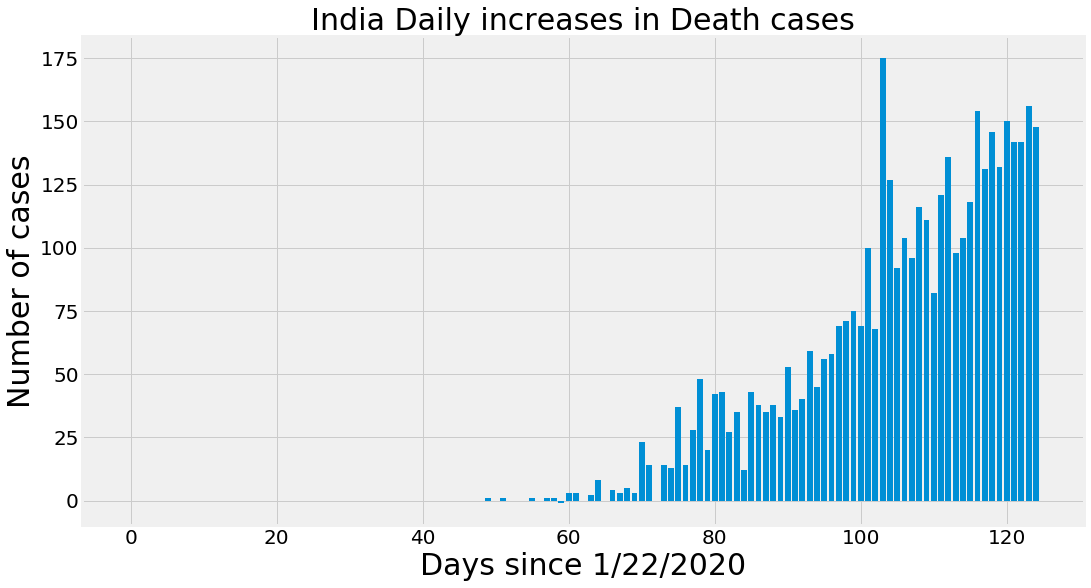

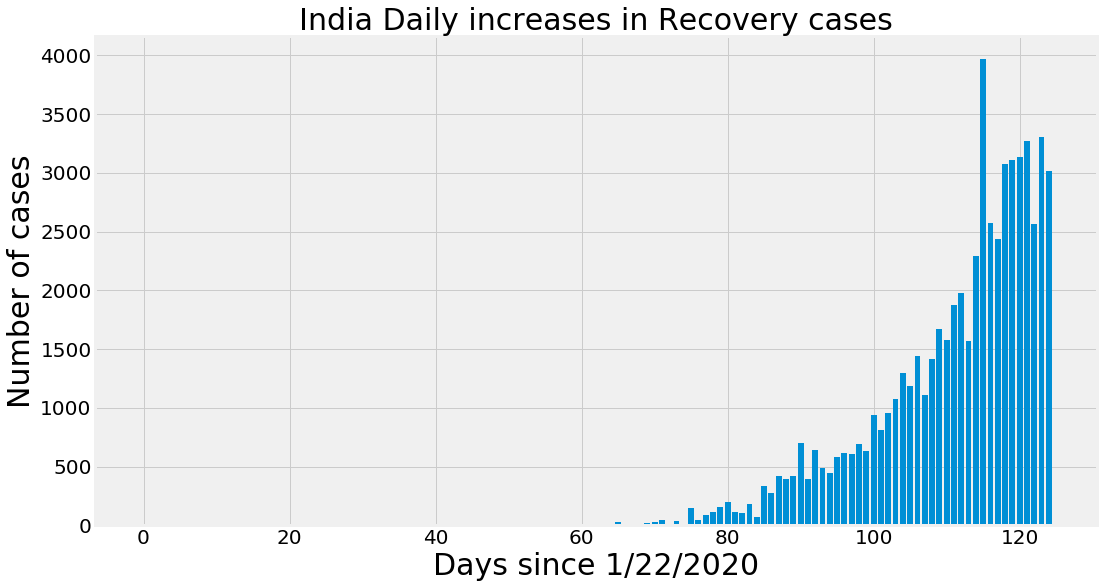

In [74]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery,'India')

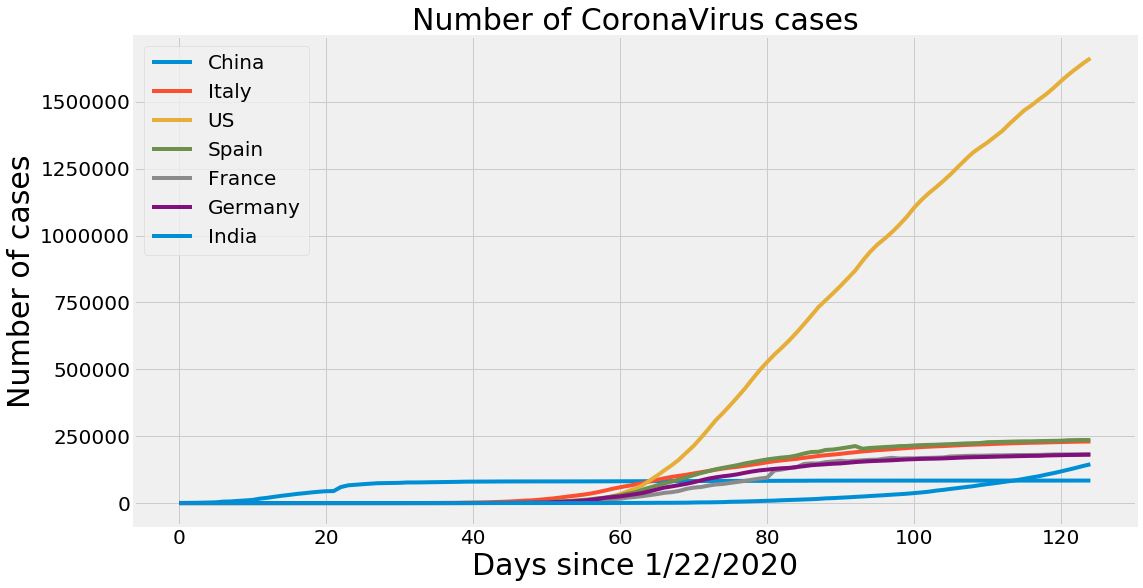

In [75]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of CoronaVirus cases', size=30)
plt.xlabel('Days since 1/22/2020',size= 30)
plt.ylabel('Number of cases', size=30)
plt.legend(['China','Italy','US','Spain','France','Germany','India'], prop = {'size':20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()